In [ ]:
# https://learn.microsoft.com/ja-jp/training/modules/train-evaluate-regression-models/

"""
- 残差・・・観測値と予測値の差（標本の回帰式から得られる＝計算で求められる）
- 誤差・・・予測値と正解値の差（母集団の真の回帰式から得られる＝計算で得られない）
"""


教師あり学習ではモデルを既知のデータに適合させ、未知のデータを推測するために、一般的な回帰直線を定義する。
この時yは求めたい変数で、xは予測に利用する変数である。

$$y = f(x)$$

正確に表すと以下のようになる

$$y = f([x_1, x_2, x_3, ...])$$

何かしらの機械学習アルゴリズムを適用することで回帰式を得ることができる。大きく分けて以下の2つがある。

- 回帰・・・価格など数値を予測する
- 分類・・・0から1のベクトルで表され、カテゴリやクラスを推測する

In this notebook, we'll focus on *regression*, using an example based on a real study in which data for a bicycle sharing scheme was collected and used to predict the number of rentals based on seasonality and weather conditions. We'll use a simplified version of the dataset from that study.

> **Citation**: The data used in this exercise is derived from [Capital Bikeshare](https://www.capitalbikeshare.com/system-data) and is used in accordance with the published [license agreement](https://www.capitalbikeshare.com/data-license-agreement).


In [ ]:
# 自転車共有データ
import pandas as pd

# load the training dataset
!wget https: // raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()


: 

In [2]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(32)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


In [3]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()


,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


利用回数に大きな隔たりがあることがわかる

/var/folders/4d/ygqjdt3d7cq593qgrbs9wbnw0000gn/T/ipykernel_6298/1339575452.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


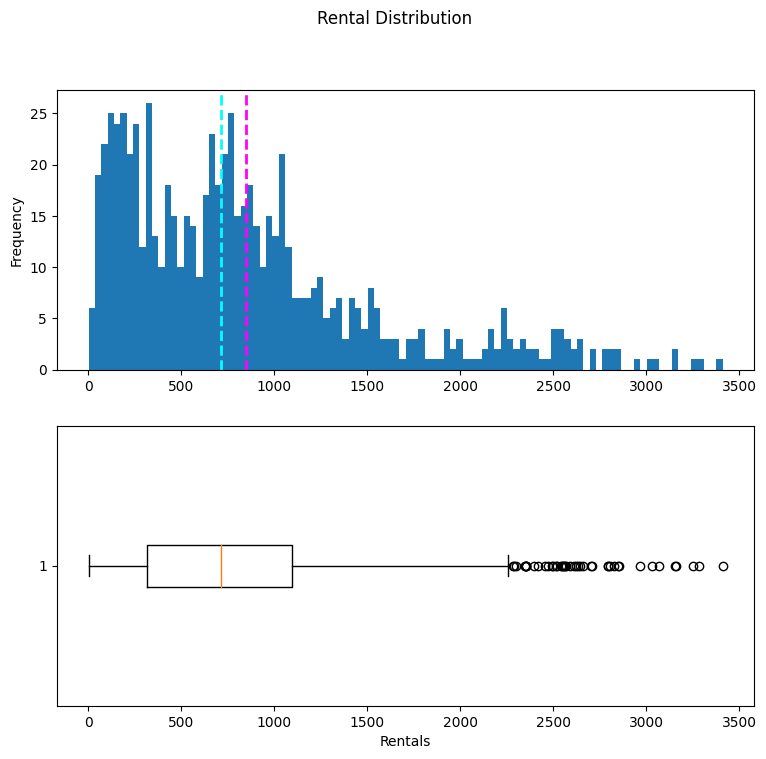

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = bike_data['rentals']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize=(9, 8))

# Plot the histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('Rental Distribution')

# Show the figure
fig.show()


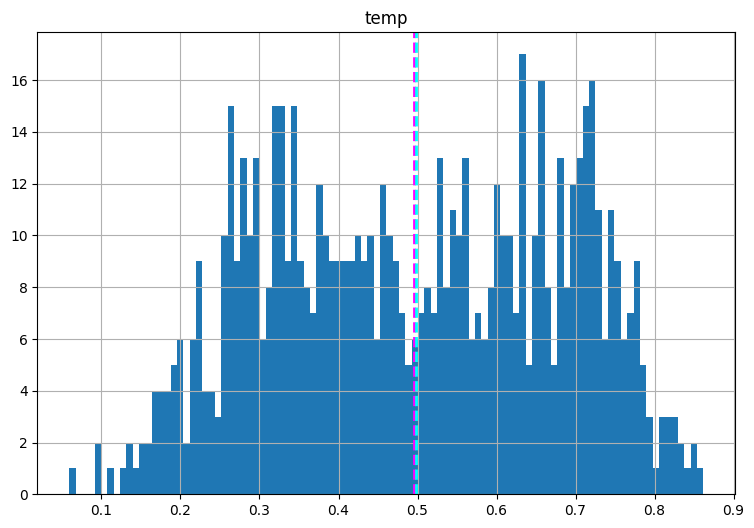

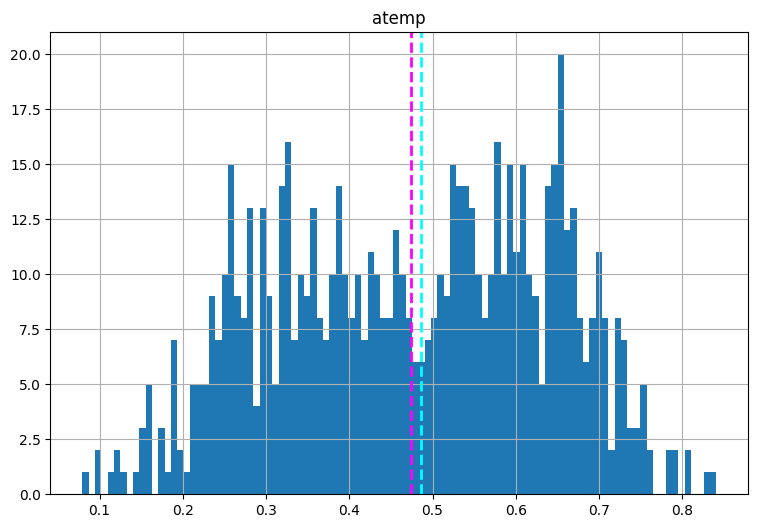

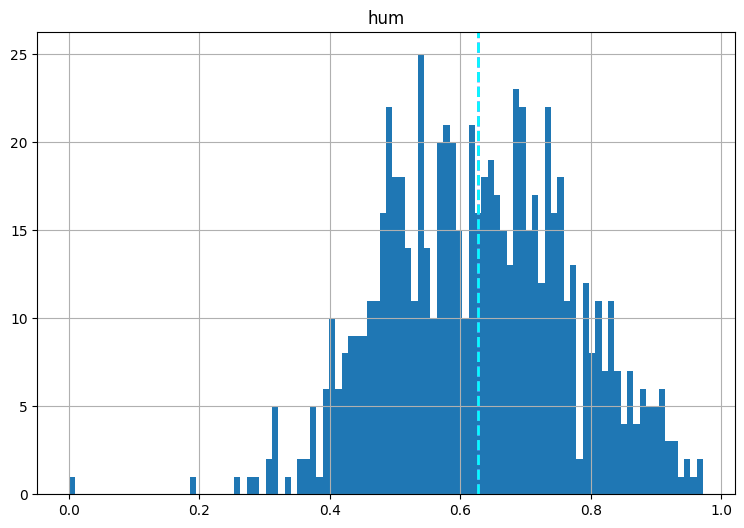

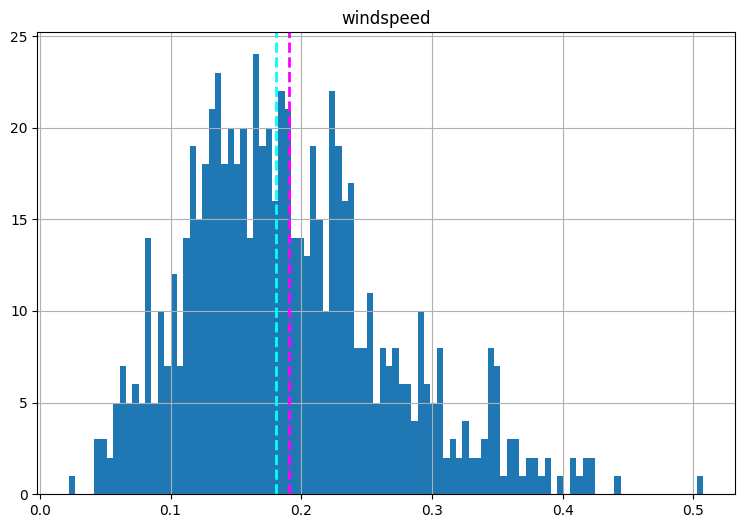

In [6]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='magenta',
               linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()


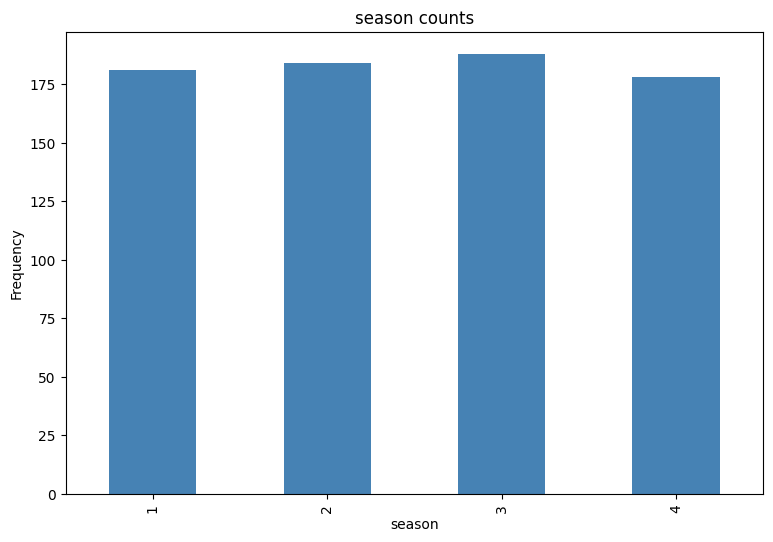

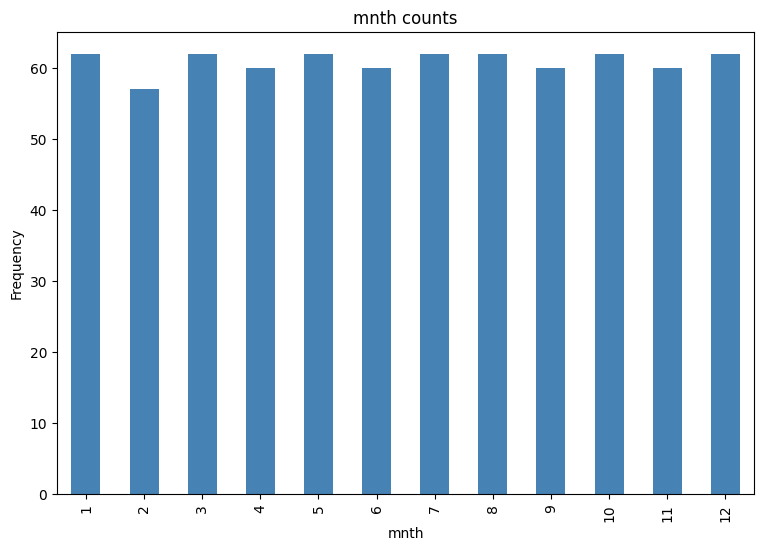

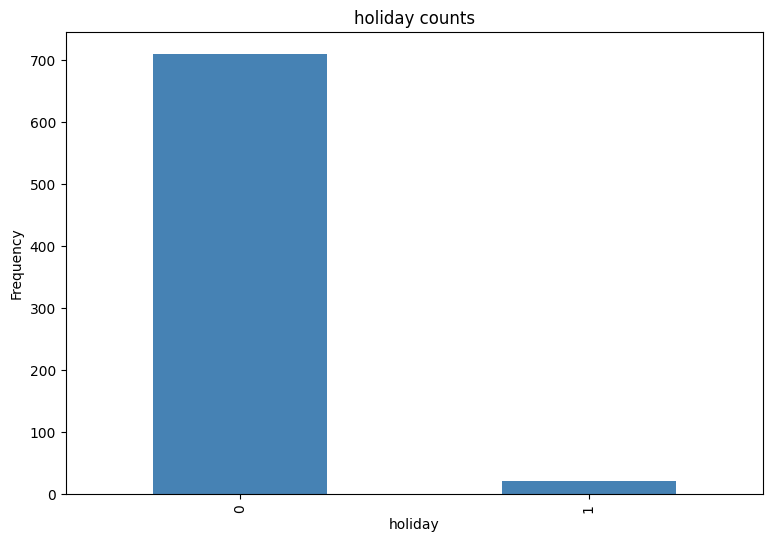

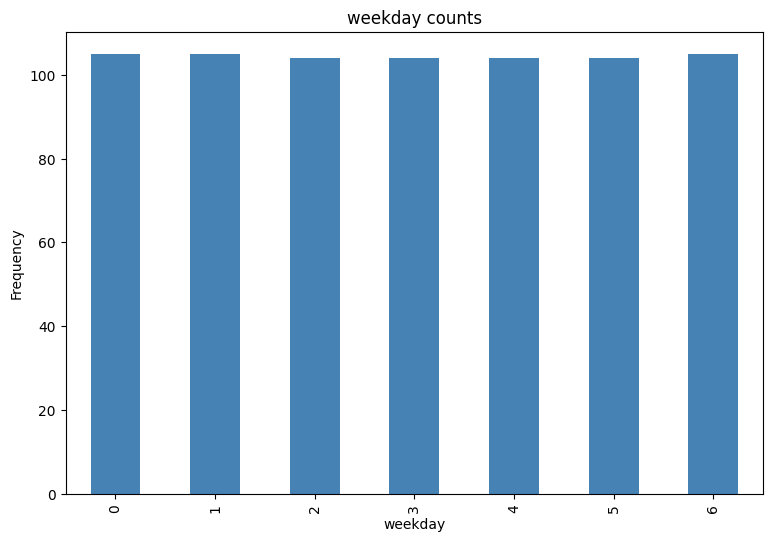

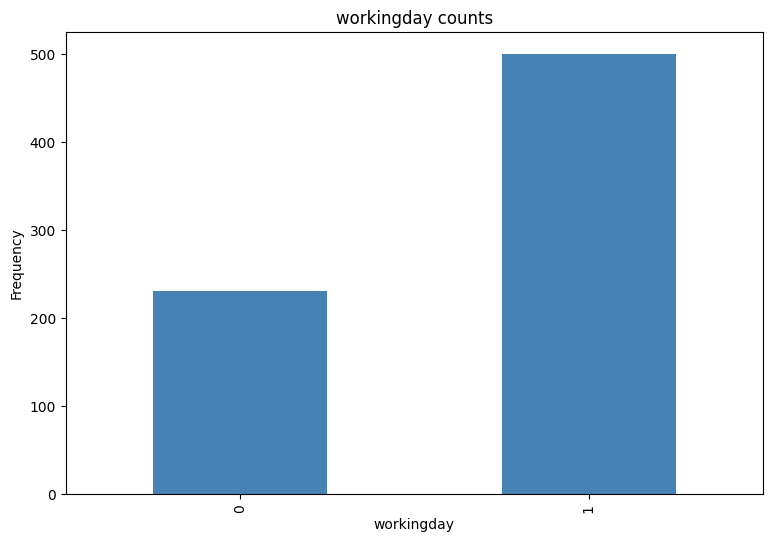

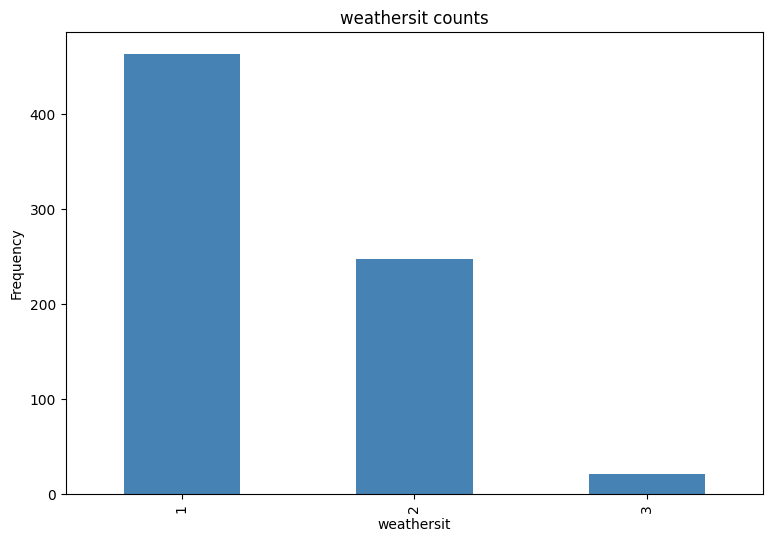

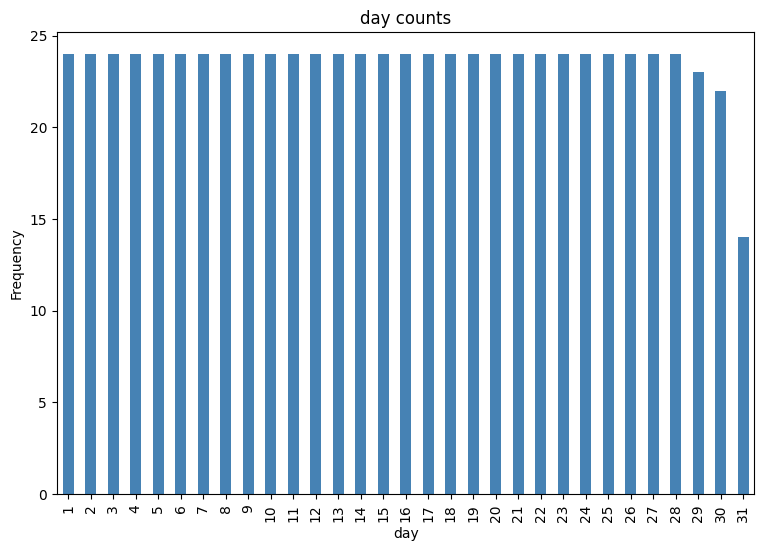

In [7]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['season', 'mnth', 'holiday',
                        'weekday', 'workingday', 'weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax=ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()


カテゴリカル変数はほぼ均一な分布であることがわかる。
→各カテゴリの行数はほぼ同じ



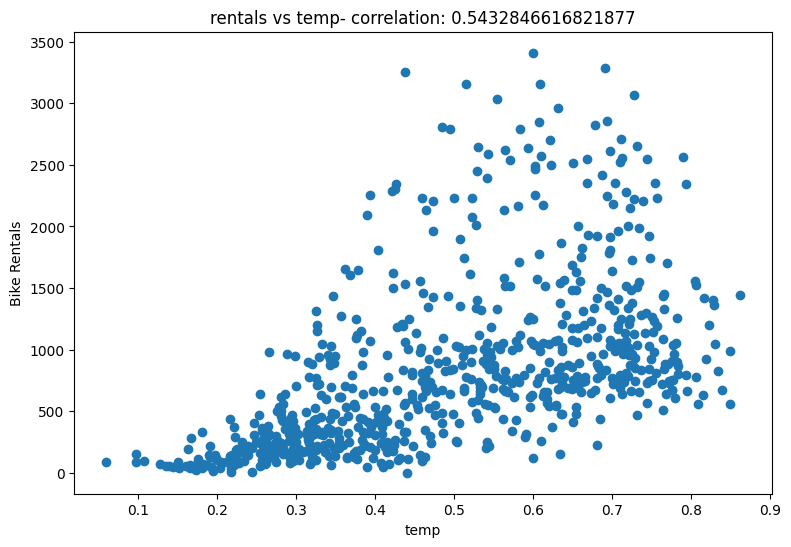

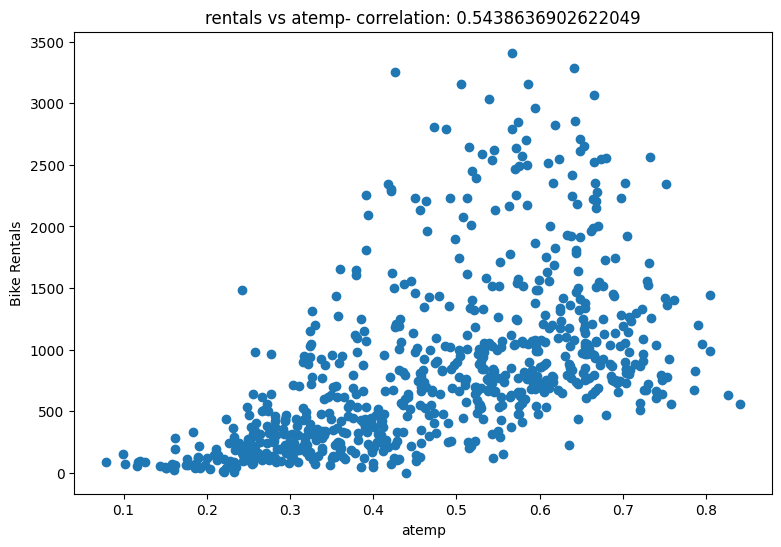

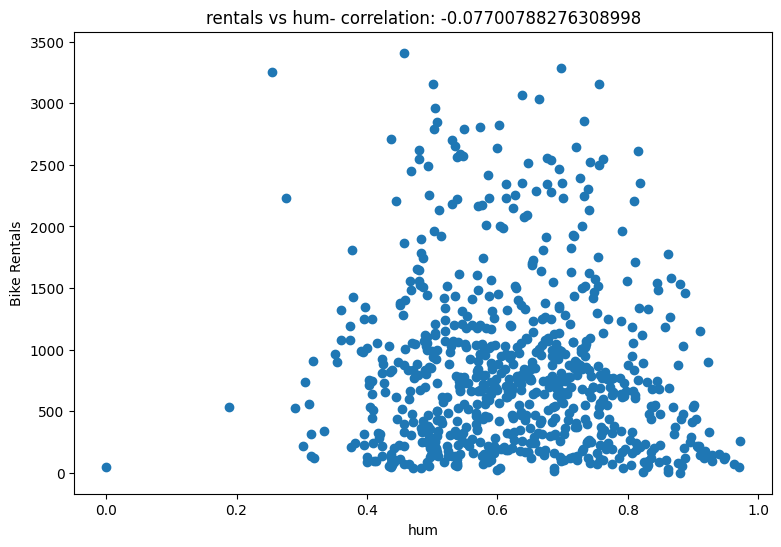

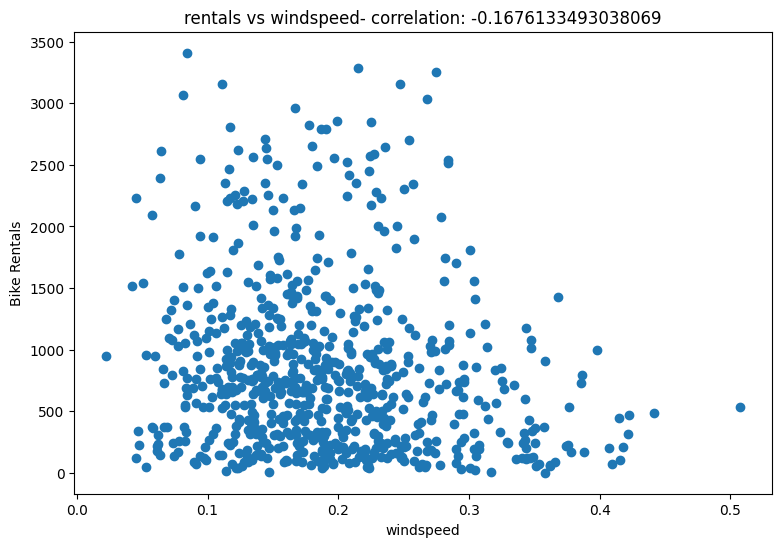

In [8]:
# 相関関係を確認する

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()



気温と利用すうに漠然とした相関がある。わずかに。  


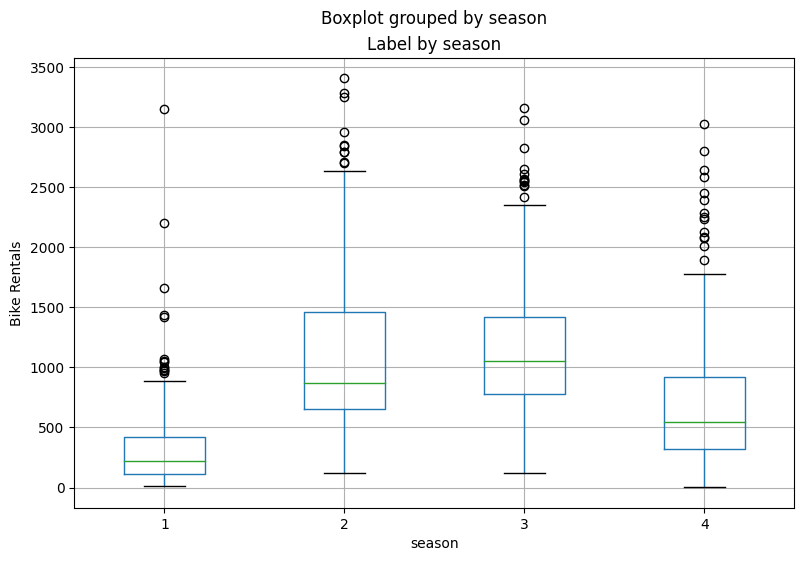

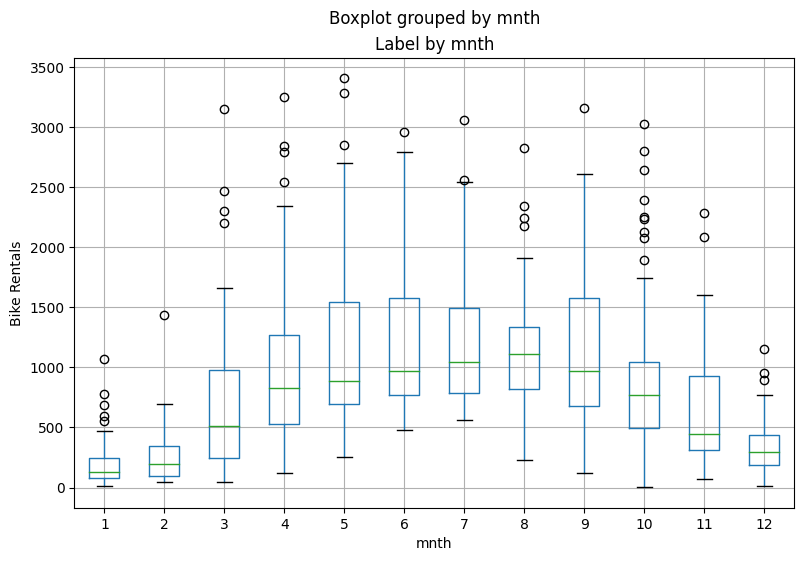

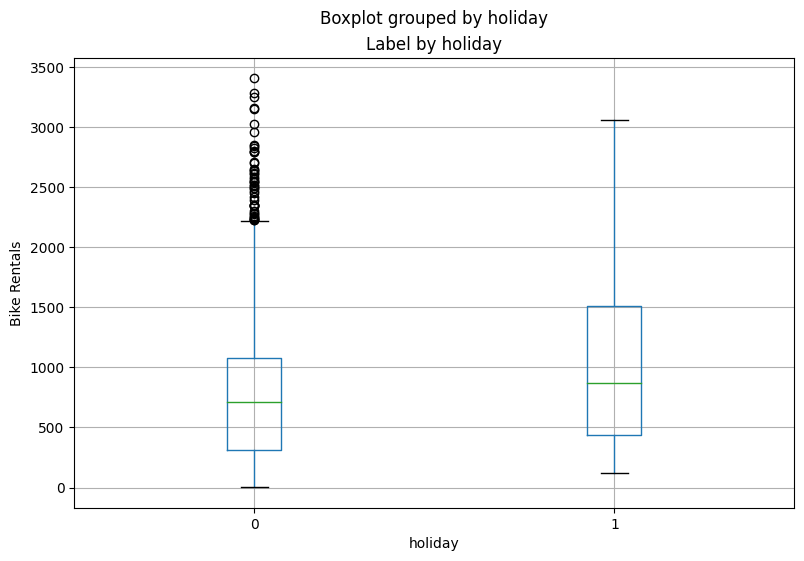

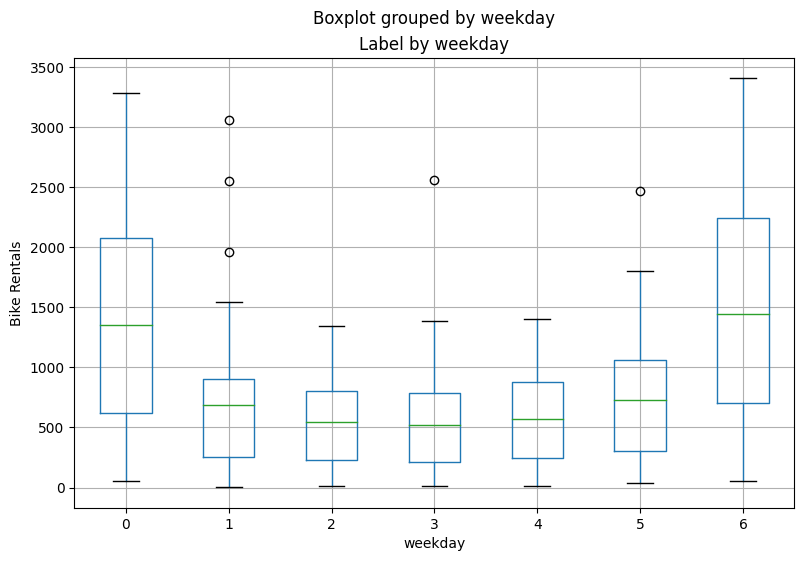

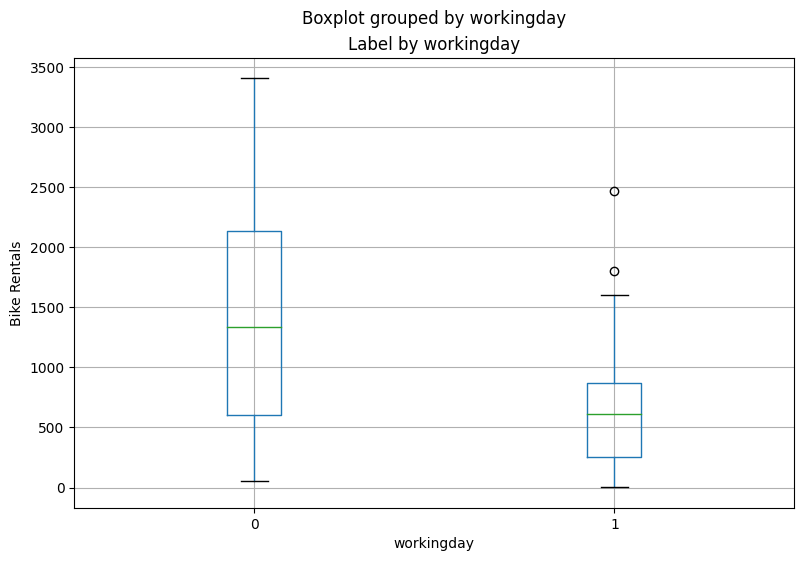

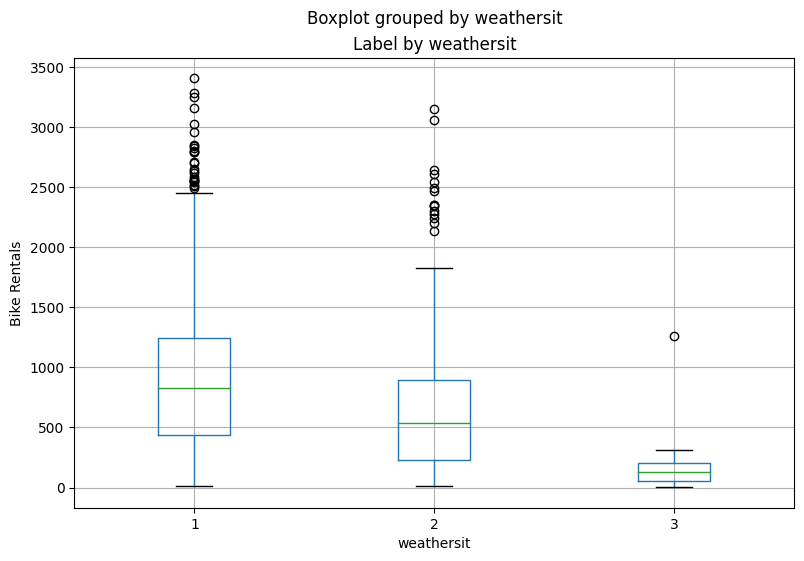

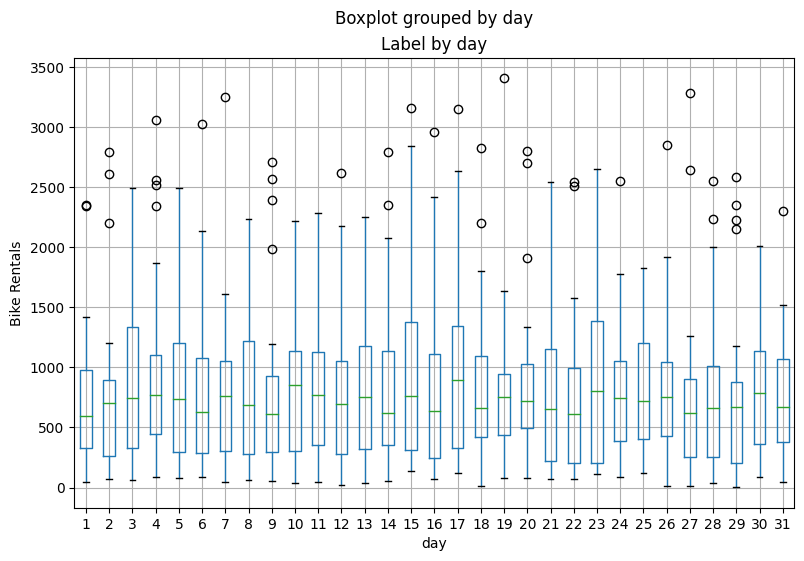

In [9]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column='rentals', by=col, ax=ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()



カテゴリ変数と利用回数を箱ひげずで確認してみる。

例えば平日・休日は違いがあることがわかる。

In [10]:
# 目的変数と説明変数を分離する
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

In [19]:
# データを検証とテストで分離する
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0)

print('Training Set: %d rows\nTest Set: %d rows' %
      (X_train.shape[0], X_test.shape[0]))

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

"""
X_train : モデルのトレーニングに使用する特徴値
y_train : モデルのトレーニングに使用する対応するラベル
X_test : モデルの検証に使用する機能値
y_test : モデルの検証に使用する対応するラベル
"""


Training Set: 511 rows
Test Set: 220 rows
(511, 10) (220, 10) (511,) (220,)


'\nX_train : モデルのトレーニングに使用する特徴値\ny_train : モデルのトレーニングに使用する対応するラベル\nX_test : モデルの検証に使用する機能値\ny_test : モデルの検証に使用する対応するラベル\n'

In [15]:
# 線形回帰を行う

from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


In [17]:
# 検証データを用いてテストする
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


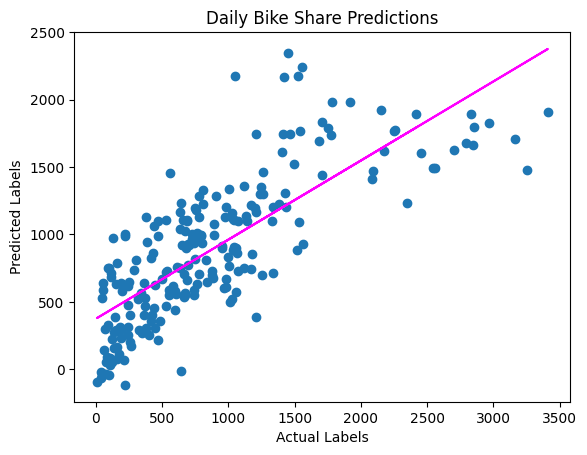

In [18]:
# 検証データの散布図と線形回帰直線を図示する。

import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()


明確な斜めの傾向があり、予測値と実際の値の交点は、通常、傾向線のパスに従っています。しかし、線で表される理想的な関数と結果にはかなりの差があります。この分散は、モデルの残差を表します。つまり、モデルがトレーニング中に学習した係数を検証データに適用したときに予測されたラベルと、検証ラベルの実際の値との差です。検証データから評価された場合のこれらの残差は、ラベルが不明な新しいデータでモデルが使用された場合に予想されるエラーのレベルを示します。

一般的に使用される多くの評価指標を計算することにより、残差を定量化できます。次の 3 つに焦点を当てます。

- 平均二乗誤差 (MSE) : 予測値と実際の値の差の二乗の平均。これにより、値が小さいほどモデルの適合度が高い相対メトリックが得られます
- 二乗平均平方根誤差 (RMSE) : MSE の平方根。これにより、ラベルと同じ単位 (この場合はレンタル数) で絶対指標が得られます。値が小さいほど、モデルは優れています (単純化して言えば、予測が間違っているレンタルの平均数を表しています!)
- 決定係数 (通常はR 二乗または Rとして知られています)2 ): 値が大きいほどモデルの適合度が高い相対メトリック。本質的に、このメトリックは、モデルが説明できる予測されたラベル値と実際のラベル値の間の分散の程度を表します。

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)


MSE: 201972.55947035598
RMSE: 449.41357285951653
R2: 0.604045473691919


## より複雑な回帰モデル

In [21]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset
!wget https: // raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season', 'mnth', 'holiday',
                        'weekday', 'workingday', 'weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
                  'temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0)

print('Training Set: %d rows\nTest Set: %d rows' %
      (X_train.shape[0], X_test.shape[0]))


--2023-03-08 08:27:26--  ftp://https/
           => '.listing'
Resolving https (https)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address 'https'
//: Scheme missing.
URL transformed to HTTPS due to an HSTS policy
--2023-03-08 08:27:26--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: 'daily-bike-share.csv.1'

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.02s   

2023-03-08 08:27:27 (3.08 MB/s) - 'daily-bike-share.csv.1' saved [48800/48800]

FINISHED --2023-03-08 08:27:27--
Total wall clock time: 0.6s
Downloaded: 1 files, 48K 

Lasso() 

MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.6056468637824488


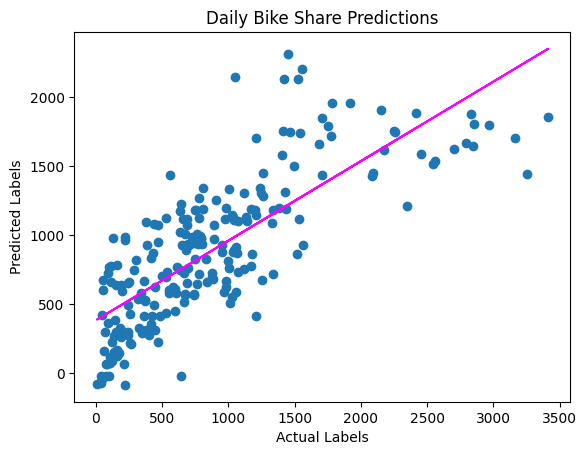

In [22]:
# Lessoアルゴリズム（線形）を用いて、回帰モデルをトレーニングする

from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print(model, "\n")

# 評価する
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()


In [23]:
# 決定木を使う
# 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print(model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)


DecisionTreeRegressor() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_9 <= 0.33
|   |   |   |   |   |   |--- feature_7 <= 0.27
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_7 >  0.27
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |--- feature_9 >  0.33
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_9 <= 0.28
|   |   |   |   |   |   |--- feature_7 <= 0.27
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |   |--- feature_7 >  0.27
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |--- feature_9 >  0.28
|   |   |   |   |   |   |--- feature_7 <= 0.28
|   |   |   |   |   |   |   |--- value: [532.00]
|   |   |   |   |   |   |--- feature_7 >  0.28
|   |   |   |   |   |   |   |--- val

MSE: 249717.2590909091
RMSE: 499.71717910324946
R2: 0.5104449867170909


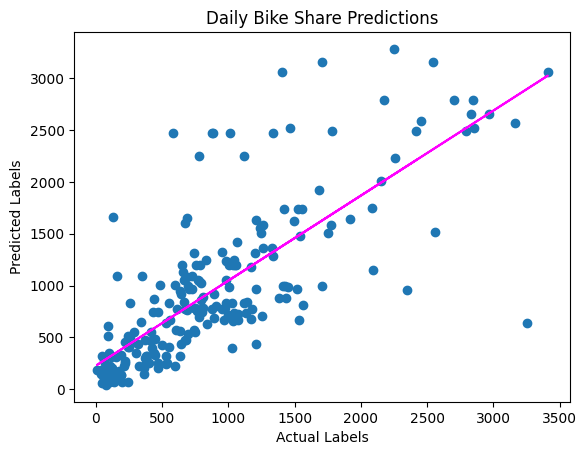

In [24]:
# テストデータで評価する
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()


線形回帰も分類木も大きな違いがないことがわかる。

他のアルゴリズムはあるだろうか。

RandomForestRegressor() 

MSE: 112815.6182959091
RMSE: 335.8803630698125
R2: 0.7788320610500246


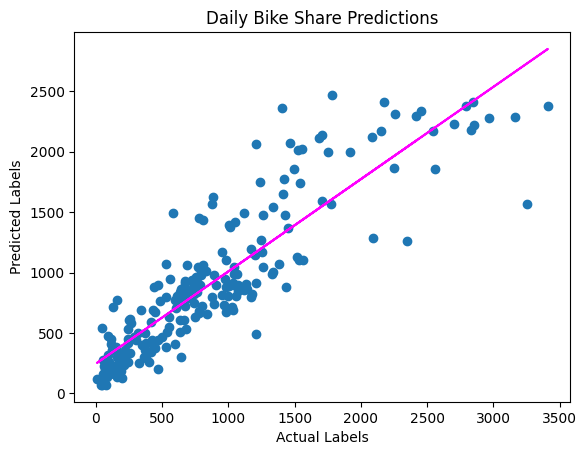

In [25]:
# アンサンブル学習を行う。
# ランダムフォレストを実行する

from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()


GradientBoostingRegressor() 

MSE: 103842.63124830552
RMSE: 322.2462276711793
R2: 0.7964230389794986


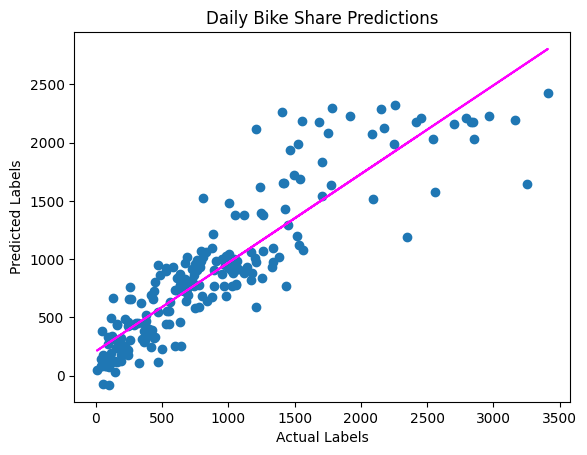

In [26]:
# ブースティングアルゴリズムを実行する

# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()


# ハイパーパラメータを変更してパフォーマンス向上を行う


In [27]:
# データを読み込む
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset
!wget https: // raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season', 'mnth', 'holiday',
                        'weekday', 'workingday', 'weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
                  'temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0)

print('Training Set: %d rows\nTest Set: %d rows' %
      (X_train.shape[0], X_test.shape[0]))


--2023-03-08 08:48:03--  ftp://https/
           => '.listing'
Resolving https (https)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address 'https'
//: Scheme missing.
URL transformed to HTTPS due to an HSTS policy
--2023-03-08 08:48:03--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: 'daily-bike-share.csv.2'

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.01s   

2023-03-08 08:48:03 (3.52 MB/s) - 'daily-bike-share.csv.2' saved [48800/48800]

FINISHED --2023-03-08 08:48:03--
Total wall clock time: 0.4s
Downloaded: 1 files, 48K 

GradientBoostingRegressor() 

MSE: 103811.49656660692
RMSE: 322.1979152114534
R2: 0.7964840765688427


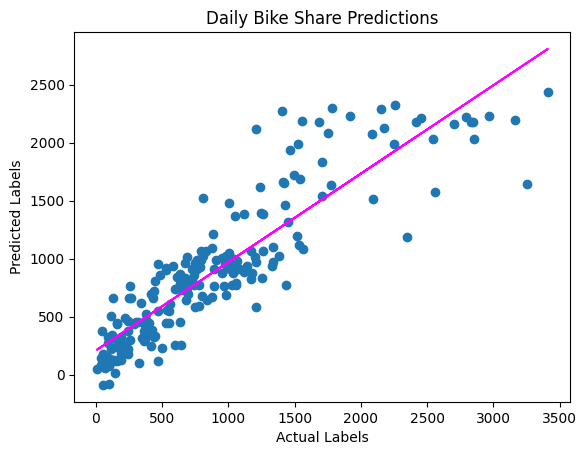

In [28]:
# ブースティングにて

# Train the model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()


幸いなことに、SciKit-Learnは、複数の組み合わせを試して、特定のパフォーマンス メトリクスに最適な結果を見つけることで、ハイパーパラメーターを調整する方法を提供します。

グリッド検索アプローチを使用して、 GradientBoostingRegressorエスティメーターのlearning_rateおよびn_estimatorsハイパーパラメーターの可能な値のグリッドから組み合わせを試してみましょう。

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

MSE: 103732.86057618314
RMSE: 322.0758615236217
R2: 0.7966382374925873


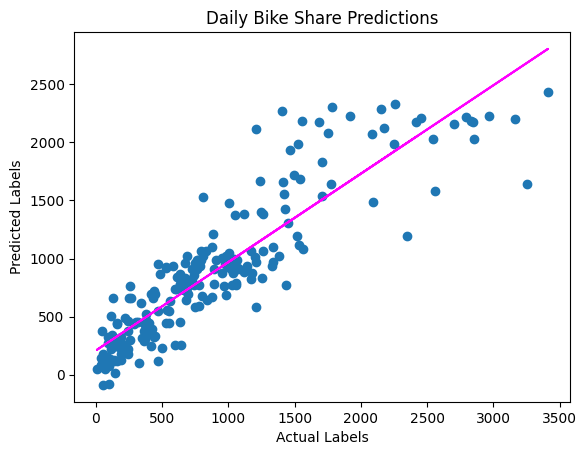

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

あまり変わらなかった。

多くの場合、デフォルトのパラメタを利用する方が優れている。

どちらかというと前処理の方が大事

---

前処理変換をレンタル自転車に適用するために、パイプラインという名前の Scikit-Learn 機能を利用します。これらにより、アルゴリズムで終了する一連の前処理ステップを定義できます。次に、パイプライン全体をデータに適合させて、モデルがすべての前処理ステップと回帰アルゴリズムをカプセル化するようにします。モデルを使用して新しいデータから値を予測する場合、同じ変換を適用する必要があるため、これは便利です (トレーニング データで使用されたのと同じ統計分布とカテゴリ エンコーディングに基づいて)。

In [30]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 105324.12765174972
RMSE: 324.53678936562756
R2: 0.7935186582646572


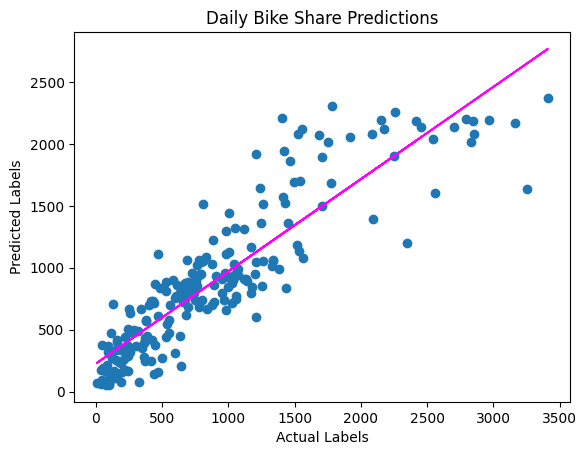

In [31]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 105364.81514318183
RMSE: 324.59946879682633
R2: 0.7934388929913997


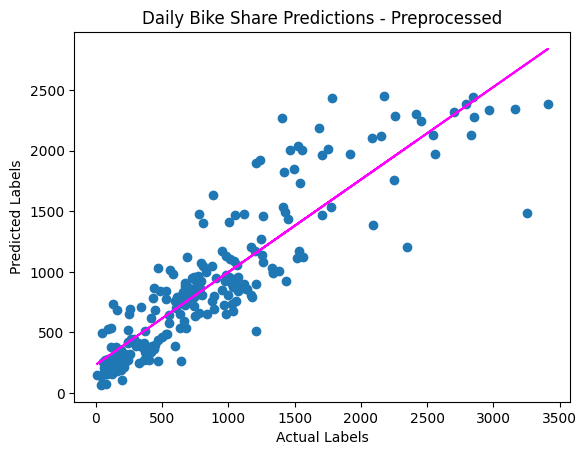

In [32]:
# パイプラインで別のアルゴリズムを利用する
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print(model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()


トレーニング済みモデルを使用する
まず、モデルを保存しましょう。

In [33]:
import joblib

# Save the model as a pickle file
filename = './bike-share.pkl'
joblib.dump(model, filename)


['./bike-share.pkl']

In [34]:
# これで、必要なときにいつでもロードして、新しいデータのラベルを予測するために使用できます。これは、スコアリングまたは推論と呼ばれることがよくあります。

# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1, 1, 0, 3, 1, 1, 0.226957, 0.22927,
                 0.436957, 0.1869]]).astype('float64')
print('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))


New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 105 rentals


In [35]:
# 予測してみる

# An array of features based on five-day weather forecast
X_new = np.array([[0, 1, 1, 0, 0, 1, 0.344167, 0.363625, 0.805833, 0.160446],
                  [0, 1, 0, 1, 0, 1, 0.363478, 0.353739, 0.696087, 0.248539],
                  [0, 1, 0, 2, 0, 1, 0.196364, 0.189405, 0.437273, 0.248309],
                  [0, 1, 0, 3, 0, 1, 0.2, 0.212122, 0.590435, 0.160296],
                  [0, 1, 0, 4, 0, 1, 0.226957, 0.22927, 0.436957, 0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))


5-day rental predictions:
579.0
740.0
264.0
196.0
268.0
